### Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import linear_model, metrics
from sklearn.cross_validation import train_test_split, cross_val_score
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre processing

In [2]:
dta= load_iris()
df = pd.DataFrame(dta.data)
df.columns = [x.split()[0] + '_' + x.split()[1] for x in dta.feature_names]
df['target'] = dta.target
df['target_name'] = dta.target_names[df.target]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Data Exploration

In [3]:
df.groupby(df.target_name).mean()

,sepal_length,sepal_width,petal_length,petal_width,target
target_name,,,,,
setosa,5.006,3.418,1.464,0.244,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


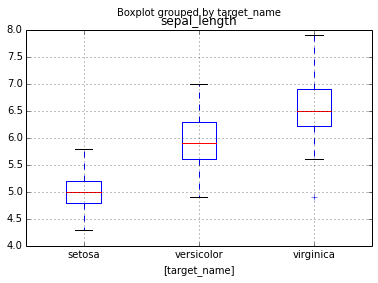

In [4]:
df.boxplot(column='sepal_length', by='target_name')

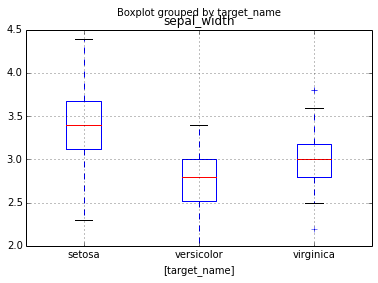

In [5]:
df.boxplot(column='sepal_width', by='target_name')

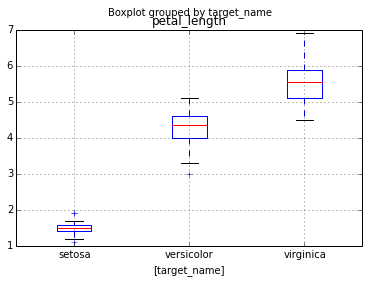

In [6]:
df.boxplot(column='petal_length', by='target_name')

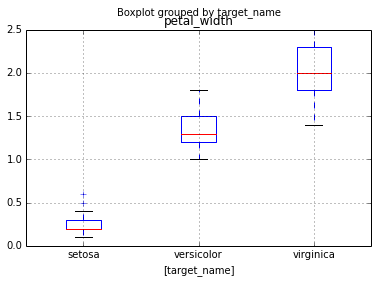

In [7]:
df.boxplot(column='petal_width', by='target_name')

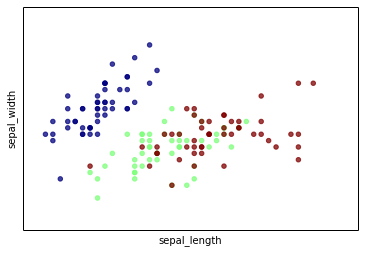

In [8]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['target'], alpha=0.75, edgecolors='face')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.xticks(())
xx = plt.yticks(())

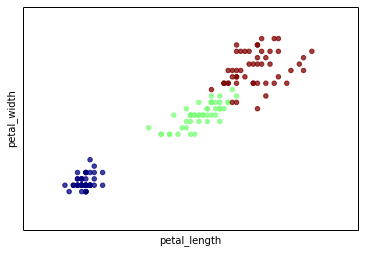

In [9]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['target'], alpha=0.75, edgecolors='face')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.xticks(())
xx = plt.yticks(())

### Feature Extraction

In [10]:
y, X = dmatrices('target ~ sepal_length + sepal_width + petal_length + petal_width', df, return_type='dataframe')
X.columns

#flattern y into a 1-D array
y = np.ravel(y)

### Divide Data to Train and Test datasets

In [11]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Building Logit model

In [12]:
logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction and Score

In [13]:
predicted = logit.predict(X_test)
probs = logit.predict_proba(X_test) 

In [14]:
#check probability and prediction for first 5 data enrty
print probs[0:5]
print predicted[0:5]

[[  1.00180968e-03   1.78309651e-01   8.20688539e-01]
 [  2.76607073e-02   8.27913893e-01   1.44425399e-01]
 [  9.40556020e-01   5.94325933e-02   1.13871123e-05]
 [  2.31306892e-04   3.69773921e-01   6.29994772e-01]
 [  8.56826994e-01   1.43100526e-01   7.24795855e-05]]
[ 2.  1.  0.  2.  0.]


In [15]:
# Generate evaluation matrics
print metrics.accuracy_score(y_test, predicted)
#print metrics.roc_auc_score(y_test, probs[:, 1])

0.888888888889


89% accuracy. Not bad!

### Model evaluation using cross validation

In [16]:
# 10 fold cross validation
scores = cross_val_score(linear_model.LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.8         0.93333333  1.          1.        ]
0.953333333333


Cross validation score 95%

In [17]:
# check coefficients
pd.DataFrame(zip(X.columns, np.transpose(logit.coef_)))

,0,1
0,Intercept,"[0.239143299201, 0.693321468634, -0.881871260884]"
1,sepal_length,"[0.3691398893, 0.292013085985, -1.56208150821]"
2,sepal_width,"[1.28859982704, -1.45036561523, -1.12328864678]"
3,petal_length,"[-2.0952444771, 0.43479261504, 2.38904021297]"
4,petal_width,"[-0.957331176822, -1.07513236837, 1.9919234776]"


### Improve Model
Adding extra feature to our dataset. Sepal area and Petal area.

In [18]:
df2 = df.copy()
df2['sepal_area'] = (df.sepal_length * df.sepal_width)
df2['petal_area'] = (df.petal_length * df.petal_width)
df2.groupby(df.target_name).describe().transpose()

target_name   setosa                                                         \
               count     mean       std    min     25%   50%     75%    max   
sepal_length      50   5.0060  0.352490   4.30   4.800   5.0   5.200   5.80   
sepal_width       50   3.4180  0.381024   2.30   3.125   3.4   3.675   4.40   
petal_length      50   1.4640  0.173511   1.00   1.400   1.5   1.575   1.90   
petal_width       50   0.2440  0.107210   0.10   0.200   0.2   0.300   0.60   
target            50   0.0000  0.000000   0.00   0.000   0.0   0.000   0.00   
sepal_area        50  17.2088  2.947688  10.35  15.040  17.0  19.155  25.08   
petal_area        50   0.3628  0.183248   0.11   0.265   0.3   0.420   0.96   

target_name   versicolor                                                    \
                   count     mean       std   min      25%     50%     75%   
sepal_length          50   5.9360  0.516171   4.9   5.6000   5.900   6.300   
sepal_width           50   2.7700  0.313798   2.0   2.5250   2.800   3.000   
petal_length          50   4.2600  0.469911   3.0   4.0000   4.350   4.600   
petal_width           50   1.3260  0.197753   1.0   1.2000   1.300   1.500   
target                50   1.0000  0.000000   1.0   1.0000   1.000   1.000   
sepal_area            50  16.5262  2.866882  10.0  14.3475  16.385  18.495   
petal_area            50   5.7204  1.368403   3.3   4.8600   5.615   6.750   

target_name          virginica                                
                max      count     mean       std    min      
sepal_length   7.00         50   6.5880  0.635880   4.90 ...  
sepal_width    3.40         50   2.9740  0.322497   2.20 ...  
petal_length   5.10         50   5.5520  0.551895   4.50 ...  
petal_width    1.80         50   2.0260  0.274650   1.40 ...  
target         1.00         50   2.0000  0.000000   2.00 ...  
sepal_area    22.40         50  19.6846  3.458783  12.25 ...  
petal_area     8.64         50  11.2962  2.157412   7.50 ...  

[7 rows x 24 columns]

### Explore new feature

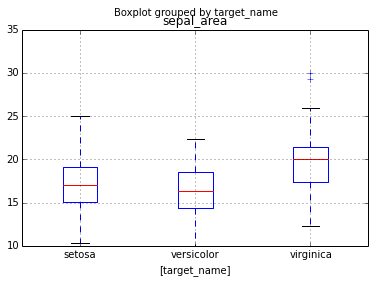

In [19]:
df2.boxplot(column='sepal_area', by='target_name')

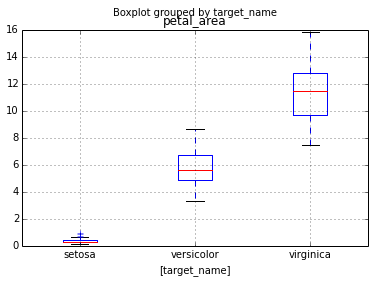

In [20]:
df2.boxplot(column='petal_area', by='target_name')

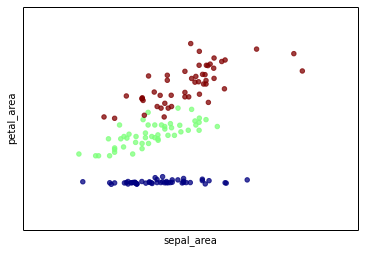

In [21]:
plt.scatter(df2['sepal_area'], df2['petal_area'], c=df2['target'], alpha=0.75, edgecolors='face')
plt.xlabel('sepal_area')
plt.ylabel('petal_area')
plt.xticks(())
xx = plt.yticks(())

### Modeling with new dataset

In [22]:
y2, X2 = dmatrices('target ~ sepal_length + sepal_width + petal_length + petal_width', df, return_type='dataframe')
X2.columns

#flattern y into a 1-D array
y2 = np.ravel(y2)

# evaluate the model by splitting into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [23]:
logit2 = linear_model.LogisticRegression()
logit2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predicted = logit.predict(X_test)
probs = logit.predict_proba(X_test)

In [25]:
# Generate evaluation matrics
print metrics.accuracy_score(y_test, predicted)

0.888888888889


Same accuracy!

In [26]:
# 10 fold cross validation
scores = cross_val_score(linear_model.LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 1.          1.          1.          0.93333333  0.93333333  0.93333333
  0.8         0.93333333  1.          1.        ]
0.953333333333


Cross Validation score same too.

Why didn't accuracy improved? 
Hint: dependent variable